In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

# 시각화 설정
sns.set_context("talk")
sns.set_style("white")
font_title = {"color":"gray"}

# Linux 한글 사용 설정
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
#https://jumin.mois.go.kr/index.jsp#
df_popkr = pd.read_csv("202108_202108_연령별인구현황_월간.csv", encoding="euc-kr")
df_popkr.head()

,행정구역,2021년08월_계_총인구수,2021년08월_계_연령구간인구수,2021년08월_계_0~9세,2021년08월_계_10~19세,2021년08월_계_20~29세,2021년08월_계_30~39세,2021년08월_계_40~49세,2021년08월_계_50~59세,2021년08월_계_60~69세,...,2021년08월_여_10~19세,2021년08월_여_20~29세,2021년08월_여_30~39세,2021년08월_여_40~49세,2021년08월_여_50~59세,2021년08월_여_60~69세,2021년08월_여_70~79세,2021년08월_여_80~89세,2021년08월_여_90~99세,2021년08월_여_100세 이상
0,전국 (0000000000),"51,669,716","51,669,716","3,827,185","4,733,729","6,721,376","6,753,189","8,192,793","8,598,568","7,072,000",...,"2,288,398","3,193,991","3,268,661","4,028,335","4,251,266","3,608,795","2,028,615","1,160,898","200,792","8,705"
1,서울특별시 (1100000000),"9,550,227","9,550,227","596,448","763,356","1,439,293","1,446,242","1,493,290","1,505,336","1,277,991",...,"372,275","744,950","723,650","753,348","763,863","674,189","379,325","175,062","30,683","1,893"
2,부산광역시 (2600000000),"3,359,527","3,359,527","223,790","267,212","421,122","408,986","504,235","556,023","546,088",...,"129,528","202,411","199,393","249,883","285,271","288,209","161,933","77,112","11,834",605
3,대구광역시 (2700000000),"2,393,626","2,393,626","171,117","220,036","314,020","286,886","375,350","419,481","339,189",...,"105,235","146,680","136,863","190,026","213,910","177,802","99,050","52,377","7,710",304
4,인천광역시 (2800000000),"2,938,429","2,938,429","220,236","271,571","393,256","400,549","480,219","508,757","391,192",...,"131,946","188,312","193,176","234,414","254,523","197,435","96,777","52,853","9,970",422


In [3]:
df_popkr["행정구역"] = df_popkr["행정구역"].str.split("(").str[0]
df_popkr.head()

,행정구역,2021년08월_계_총인구수,2021년08월_계_연령구간인구수,2021년08월_계_0~9세,2021년08월_계_10~19세,2021년08월_계_20~29세,2021년08월_계_30~39세,2021년08월_계_40~49세,2021년08월_계_50~59세,2021년08월_계_60~69세,...,2021년08월_여_10~19세,2021년08월_여_20~29세,2021년08월_여_30~39세,2021년08월_여_40~49세,2021년08월_여_50~59세,2021년08월_여_60~69세,2021년08월_여_70~79세,2021년08월_여_80~89세,2021년08월_여_90~99세,2021년08월_여_100세 이상
0,전국,"51,669,716","51,669,716","3,827,185","4,733,729","6,721,376","6,753,189","8,192,793","8,598,568","7,072,000",...,"2,288,398","3,193,991","3,268,661","4,028,335","4,251,266","3,608,795","2,028,615","1,160,898","200,792","8,705"
1,서울특별시,"9,550,227","9,550,227","596,448","763,356","1,439,293","1,446,242","1,493,290","1,505,336","1,277,991",...,"372,275","744,950","723,650","753,348","763,863","674,189","379,325","175,062","30,683","1,893"
2,부산광역시,"3,359,527","3,359,527","223,790","267,212","421,122","408,986","504,235","556,023","546,088",...,"129,528","202,411","199,393","249,883","285,271","288,209","161,933","77,112","11,834",605
3,대구광역시,"2,393,626","2,393,626","171,117","220,036","314,020","286,886","375,350","419,481","339,189",...,"105,235","146,680","136,863","190,026","213,910","177,802","99,050","52,377","7,710",304
4,인천광역시,"2,938,429","2,938,429","220,236","271,571","393,256","400,549","480,219","508,757","391,192",...,"131,946","188,312","193,176","234,414","254,523","197,435","96,777","52,853","9,970",422


In [4]:
df_popkr.replace(",", "", regex=True, inplace=True)
df_popkr.replace(" ", "", regex=True, inplace=True)
df_popkr.head()

,행정구역,2021년08월_계_총인구수,2021년08월_계_연령구간인구수,2021년08월_계_0~9세,2021년08월_계_10~19세,2021년08월_계_20~29세,2021년08월_계_30~39세,2021년08월_계_40~49세,2021년08월_계_50~59세,2021년08월_계_60~69세,...,2021년08월_여_10~19세,2021년08월_여_20~29세,2021년08월_여_30~39세,2021년08월_여_40~49세,2021년08월_여_50~59세,2021년08월_여_60~69세,2021년08월_여_70~79세,2021년08월_여_80~89세,2021년08월_여_90~99세,2021년08월_여_100세 이상
0,전국,51669716,51669716,3827185,4733729,6721376,6753189,8192793,8598568,7072000,...,2288398,3193991,3268661,4028335,4251266,3608795,2028615,1160898,200792,8705
1,서울특별시,9550227,9550227,596448,763356,1439293,1446242,1493290,1505336,1277991,...,372275,744950,723650,753348,763863,674189,379325,175062,30683,1893
2,부산광역시,3359527,3359527,223790,267212,421122,408986,504235,556023,546088,...,129528,202411,199393,249883,285271,288209,161933,77112,11834,605
3,대구광역시,2393626,2393626,171117,220036,314020,286886,375350,419481,339189,...,105235,146680,136863,190026,213910,177802,99050,52377,7710,304
4,인천광역시,2938429,2938429,220236,271571,393256,400549,480219,508757,391192,...,131946,188312,193176,234414,254523,197435,96777,52853,9970,422


In [5]:
df_popkrM = df_popkr.filter(like="남").filter(like="세")
df_popkrM.head()

,2021년08월_남_0~9세,2021년08월_남_10~19세,2021년08월_남_20~29세,2021년08월_남_30~39세,2021년08월_남_40~49세,2021년08월_남_50~59세,2021년08월_남_60~69세,2021년08월_남_70~79세,2021년08월_남_80~89세,2021년08월_남_90~99세,2021년08월_남_100세 이상
0,1961956,2445331,3527385,3484528,4164458,4347302,3463205,1674431,638176,57029,2230
1,306199,391081,694343,722592,739942,741473,603802,316988,113314,10383,623
2,114820,137684,218711,209593,254352,270752,257879,133407,43847,3186,147
3,87671,114801,167340,150023,185324,205571,161387,77302,28631,2103,70
4,112982,139625,204944,207373,245805,254234,193757,81710,28133,2657,127


In [6]:
df_popkrMT = df_popkrM.T
df_popkrMT.columns = df_popkr["행정구역"].values
df_popkrMT = df_popkrMT.astype(int)
df_popkrMT.head()

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2021년08월_남_0~9세,1961956,306199,114820,87671,112982,59220,56336,48255,23976,571021,52429,60798,85011,62816,64481,93745,131873,30323
2021년08월_남_10~19세,2445331,391081,137684,114801,139625,79544,74118,57997,22424,682200,69916,76412,104425,88743,85027,117142,167425,36767
2021년08월_남_20~29세,3527385,694343,218711,167340,204944,108281,110408,78952,19546,953039,99324,109105,132716,113075,110045,158381,205957,43218
2021년08월_남_30~39세,3484528,722592,209593,150023,207373,93241,99627,78101,29844,981132,85763,102194,140950,95077,94956,151084,202080,40898
2021년08월_남_40~49세,4164458,739942,254352,185324,245805,117683,115946,94288,36179,1167569,112857,123131,173764,134785,135745,197136,272714,57238


In [7]:
df_popkrMT["나이"] = df_popkrMT.index.str.split("_").str[2]
df_popkrMT.reset_index(drop=True, inplace=True)
df_popkrMT

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,나이
0,1961956,306199,114820,87671,112982,59220,56336,48255,23976,571021,52429,60798,85011,62816,64481,93745,131873,30323,0~9세
1,2445331,391081,137684,114801,139625,79544,74118,57997,22424,682200,69916,76412,104425,88743,85027,117142,167425,36767,10~19세
2,3527385,694343,218711,167340,204944,108281,110408,78952,19546,953039,99324,109105,132716,113075,110045,158381,205957,43218,20~29세
3,3484528,722592,209593,150023,207373,93241,99627,78101,29844,981132,85763,102194,140950,95077,94956,151084,202080,40898,30~39세
4,4164458,739942,254352,185324,245805,117683,115946,94288,36179,1167569,112857,123131,173764,134785,135745,197136,272714,57238,40~49세
5,4347302,741473,270752,205571,254234,116312,119607,104905,24647,1142604,136190,138955,179216,154876,167965,235361,295258,59376,50~59세
6,3463205,603802,257879,161387,193757,81019,91358,77277,16242,814254,127357,119511,148518,131399,142359,213440,242352,41294,60~69세
7,1674431,316988,133407,77302,81710,41790,41831,29516,6769,351154,60053,54363,78436,75991,84719,108946,110654,20802,70~79세
8,638176,113314,43847,28631,28133,14874,15309,7979,2538,133907,26741,23509,36052,31778,36205,46041,40921,8397,80~89세
9,57029,10383,3186,2103,2657,1294,1378,525,257,12672,2517,2050,3488,3150,3341,3983,3409,636,90~99세


In [8]:
df_popkrF = df_popkr.filter(like="여").filter(like="세")
df_popkrFT = df_popkrF.T
df_popkrFT.columns = df_popkr["행정구역"].values
df_popkrFT = df_popkrFT.astype(int)
df_popkrFT["나이"] = df_popkrFT.index.str.split("_").str[2]
df_popkrFT.reset_index(drop=True, inplace=True)
df_popkrFT.head(3)

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,나이
0,1865229,290249,108970,83446,107254,56289,53206,45653,22975,544708,49911,58247,81037,59589,62085,88360,124609,28641,0~9세
1,2288398,372275,129528,105235,131946,74080,69266,52410,22139,644846,64782,70660,96830,82643,79108,105906,153221,33523,10~19세
2,3193991,744950,202411,146680,188312,99186,99999,60931,18639,856195,77179,87053,107080,95986,86589,121197,163188,38416,20~29세


In [105]:
df_popkrMT.to_pickle("df_popkrMT.pkl")
df_popkrFT.to_pickle("df_popkrFT.pkl")

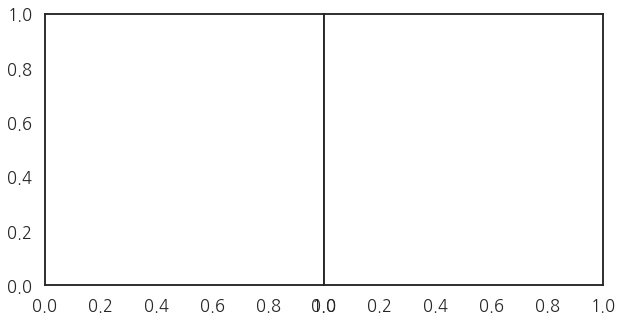

In [9]:
fig, axs = plt.subplots(ncols=2, sharey=True, 
                        figsize=(10, 5), gridspec_kw={"wspace":0})

fig.savefig("85_popkr_09.png")

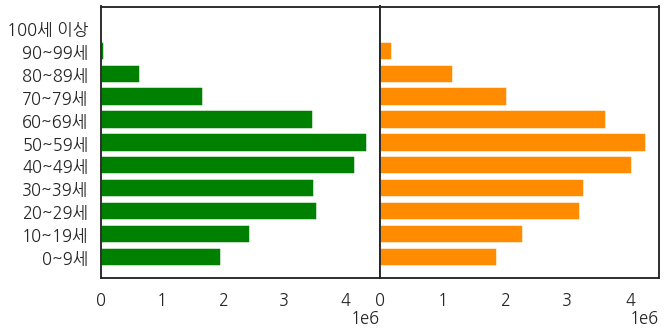

In [10]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(10, 5), gridspec_kw={"wspace":0})
axs[0].barh(df_popkrMT["나이"], df_popkrMT["전국"], color="green")
axs[1].barh(df_popkrFT["나이"], df_popkrFT["전국"], color="darkorange")

fig.savefig("85_popkr_10.png")

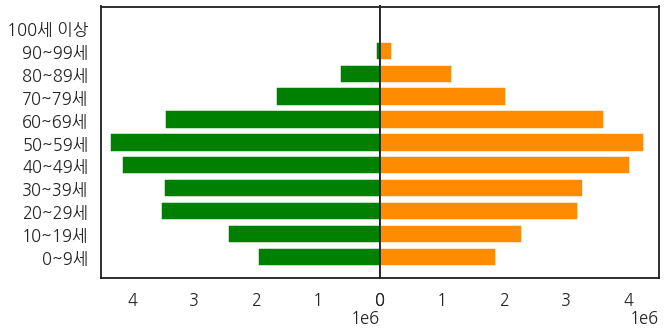

In [11]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(10, 5), gridspec_kw={"wspace":0})
axs[0].barh(df_popkrMT["나이"], df_popkrMT["전국"], color="green")
axs[1].barh(df_popkrFT["나이"], df_popkrFT["전국"], color="darkorange")

xmax = 4.5e6
axs[0].set_xlim(xmax, 0)
axs[1].set_xlim(0, xmax)

fig.savefig("85_popkr_11.png")

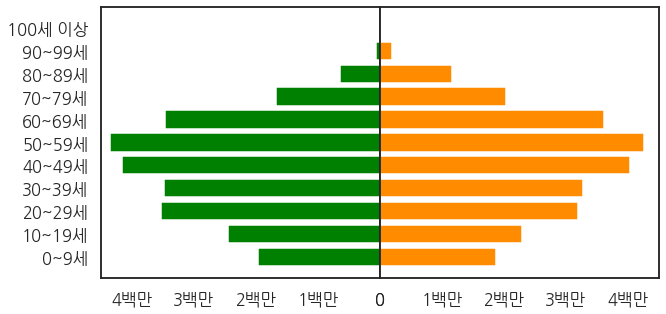

In [12]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(10, 5), gridspec_kw={"wspace":0})
axs[0].barh(df_popkrMT["나이"], df_popkrMT["전국"], color="green")
axs[1].barh(df_popkrFT["나이"], df_popkrFT["전국"], color="darkorange")

xmax = 4.5e6
axs[0].set_xlim(xmax, 0)
axs[1].set_xlim(0, xmax)

xticks = np.arange(0, xmax, 1e6)
for ax in axs:
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{int(x*1e-6)}백만" if x != 0 else "0" for x in xticks])
    
fig.savefig("85_popkr_12.png")

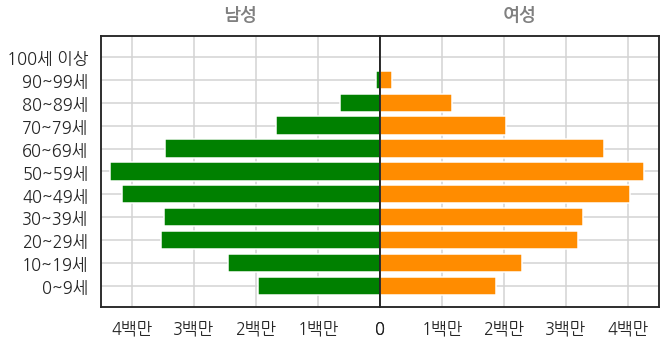

In [13]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(10, 5), gridspec_kw={"wspace":0})
axs[0].barh(df_popkrMT["나이"], df_popkrMT["전국"], color="green")
axs[1].barh(df_popkrFT["나이"], df_popkrFT["전국"], color="darkorange")

xmax = 4.5e6
axs[0].set_xlim(xmax, 0)
axs[1].set_xlim(0, xmax)

xticks = np.arange(0, xmax, 1e6)
for ax, title in zip(axs, ["남성", "여성"]):
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{int(x*1e-6)}백만" if x != 0 else "0" for x in xticks])
    ax.grid(c="lightgray")
    ax.set_title(title, color="gray", fontweight="bold", pad=16)
    
fig.savefig("85_popkr_13.png")

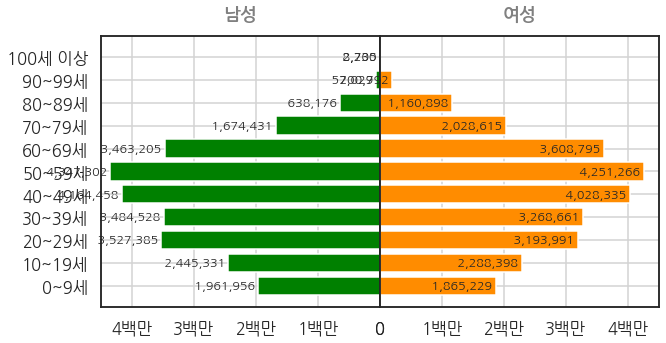

In [43]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(10, 5), gridspec_kw={"wspace":0})
axs[0].barh(df_popkrMT["나이"], df_popkrMT["전국"], color="green")
axs[1].barh(df_popkrFT["나이"], df_popkrFT["전국"], color="darkorange")

xmax = 4.5e6
axs[0].set_xlim(xmax, 0)
axs[1].set_xlim(0, xmax)

xticks = np.arange(0, xmax, 1e6)
for ax, title in zip(axs, ["남성", "여성"]):
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{int(x*1e-6)}백만" if x != 0 else "0" for x in xticks])
    ax.grid(c="lightgray")
    ax.set_title(title, color="gray", fontweight="bold", pad=16)
    
for ax in axs:
    for i, p in enumerate(ax.patches):
        w = p.get_width()
        ax.text(w, i, f" {format(w, ',')} ", 
                fontsize="x-small", va="center", ha="right")
        
fig.savefig("85_popkr_14.png")

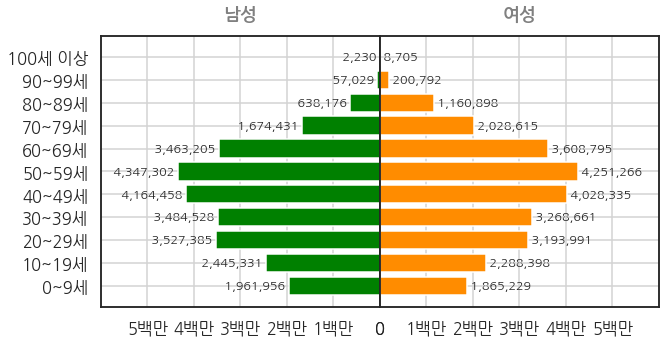

In [49]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(10, 5), gridspec_kw={"wspace":0})
axs[0].barh(df_popkrMT["나이"], df_popkrMT["전국"], color="green")
axs[1].barh(df_popkrFT["나이"], df_popkrFT["전국"], color="darkorange")

xmax = 6e6
axs[0].set_xlim(xmax, 0)
axs[1].set_xlim(0, xmax)

xticks = np.arange(0, xmax, 1e6)
for ax, title in zip(axs, ["남성", "여성"]):
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{int(x*1e-6)}백만" if x != 0 else "0" for x in xticks])
    ax.grid(c="lightgray")
    ax.set_title(title, color="gray", fontweight="bold", pad=16)
    
for ax in axs:
    for i, p in enumerate(ax.patches):
        w = p.get_width()
        if ax == axs[0]:
            ha = "right"
        else:
            ha = "left"
        
        ax.text(w, i, f" {format(w, ',')} ", 
                fontsize="x-small", va="center", ha=ha)
        
fig.savefig("85_popkr_15.png")

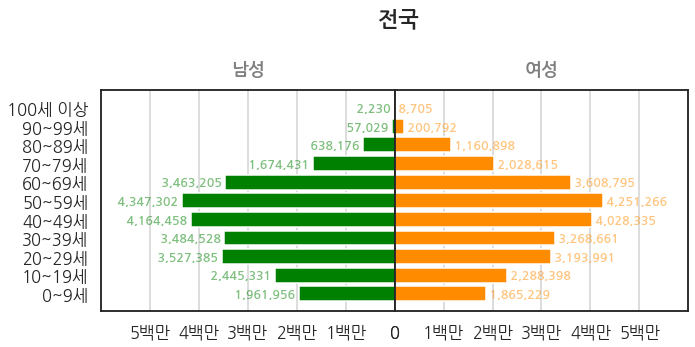

In [86]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(10, 5), gridspec_kw={"wspace":0})

c_M = "green"
c_F = "darkorange"
axs[0].barh(df_popkrMT["나이"], df_popkrMT["전국"], color=c_M)
axs[1].barh(df_popkrFT["나이"], df_popkrFT["전국"], color=c_F)

xmax = 6e6
axs[0].set_xlim(xmax, 0)
axs[1].set_xlim(0, xmax)

xticks = np.arange(0, xmax, 1e6)
for ax, title in zip(axs, ["남성", "여성"]):
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{int(x*1e-6)}백만" if x != 0 else "0" for x in xticks])
    ax.grid(axis="x", c="lightgray")
    ax.set_title(title, color="gray", fontweight="bold", pad=16)
    
for ax in axs:
    for i, p in enumerate(ax.patches):
        w = p.get_width()
        if ax == axs[0]:
            ha = "right"
            c = c_M
        else:
            ha = "left"
            c = c_F
        
        ax.text(w, i, f" {format(w, ',')} ", 
                c=c, fontsize="x-small", va="center", ha=ha, 
                fontweight="bold", alpha=0.5)

fig.suptitle("                 전국", fontweight="bold")
fig.tight_layout()
fig.savefig("85_popkr_17.png")

In [87]:
def plot_pop(loc, popmax=6e6, poptick=1e6):
    fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(10, 5), gridspec_kw={"wspace":0})

    c_M = "green"
    c_F = "darkorange"
    axs[0].barh(df_popkrMT["나이"], df_popkrMT[loc], color=c_M)
    axs[1].barh(df_popkrFT["나이"], df_popkrFT[loc], color=c_F)

    axs[0].set_xlim(popmax, 0)
    axs[1].set_xlim(0, popmax)

    xticks = np.arange(0, popmax, poptick)
    if poptick >= 1e6:
        factor, unit = 1e-6, "백만"
    elif 1e5 <= poptick < 1e6:
        factor, unit = 1e-5, "십만"
    elif 1e4 <= poptick < 2e5:
        factor, unit = 1e-4, "만"
    elif 1e3 <= poptick < 2e4:
        factor, unit = 1e-3, "천"
        
    for ax, title in zip(axs, ["남성", "여성"]):
        ax.set_xticks(xticks)
        ax.set_xticklabels([f"{int(x*factor)}{unit}" if x != 0 else "0" for x in xticks])
        ax.grid(axis="x", c="lightgray")
        ax.set_title(title, color="gray", fontweight="bold", pad=16)

    for ax in axs:
        for i, p in enumerate(ax.patches):
            w = p.get_width()
            if ax == axs[0]:
                ha = "right"
                c = c_M
            else:
                ha = "left"
                c = c_F

            ax.text(w, i, f" {format(w, ',')} ", 
                    c=c, fontsize="x-small", va="center", ha=ha, 
                    fontweight="bold", alpha=0.5)

    fig.suptitle(f"                 {loc}", fontweight="bold")
    fig.tight_layout()
    
    return fig

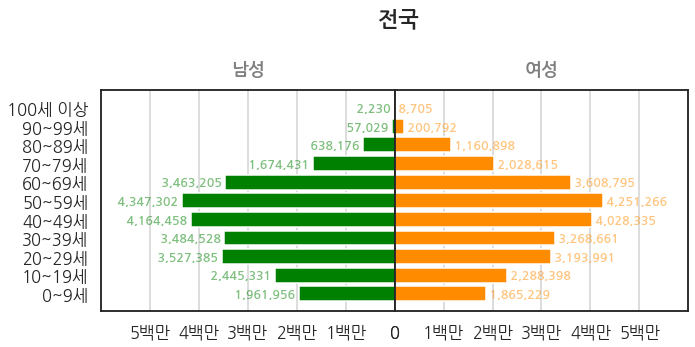

In [88]:
fig = plot_pop("전국")
fig.savefig("85_popkr_18.png")

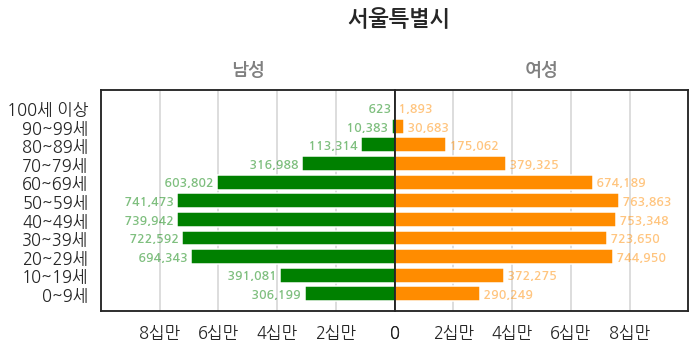

In [89]:
fig = plot_pop("서울특별시", popmax=1e6, poptick=2e5)
fig.savefig("85_popkr_19.png")

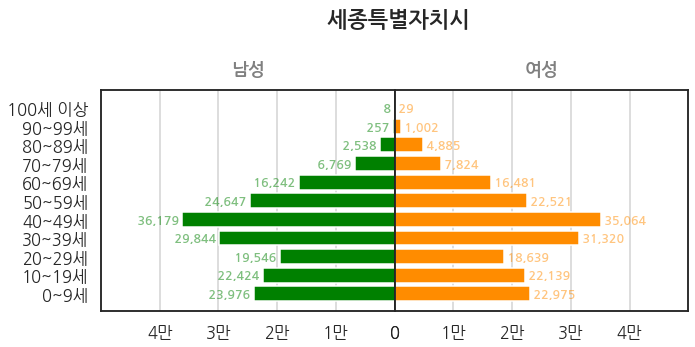

In [90]:
fig = plot_pop("세종특별자치시", popmax=5e4, poptick=1e4)
fig.savefig("85_popkr_20.png")

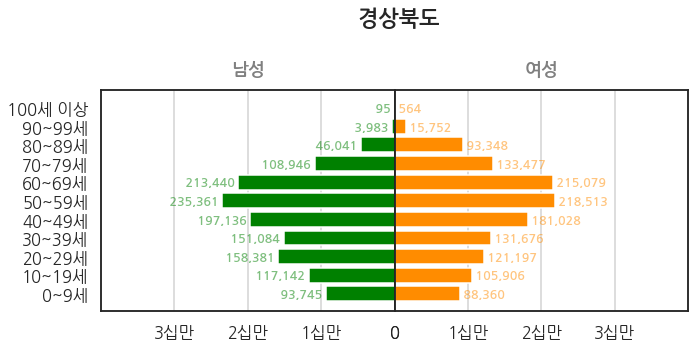

In [91]:
fig = plot_pop("경상북도", popmax=4e5, poptick=1e5)
fig.savefig("85_popkr_22.png")

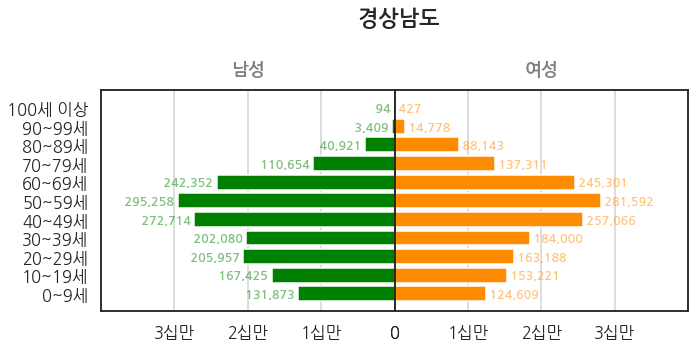

In [92]:
fig = plot_pop("경상남도", popmax=4e5, poptick=1e5)
fig.savefig("85_popkr_23.png")

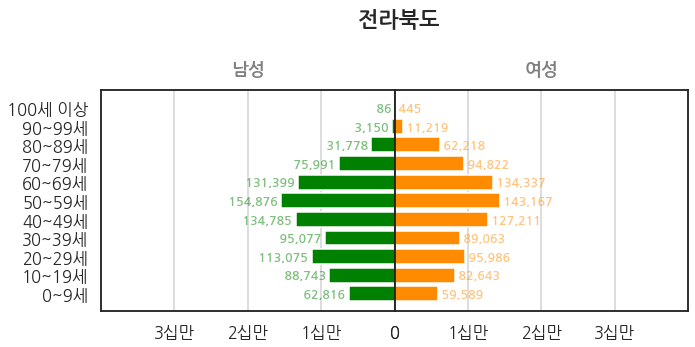

In [93]:
fig = plot_pop("전라북도", popmax=4e5, poptick=1e5)
fig.savefig("85_popkr_24.png")

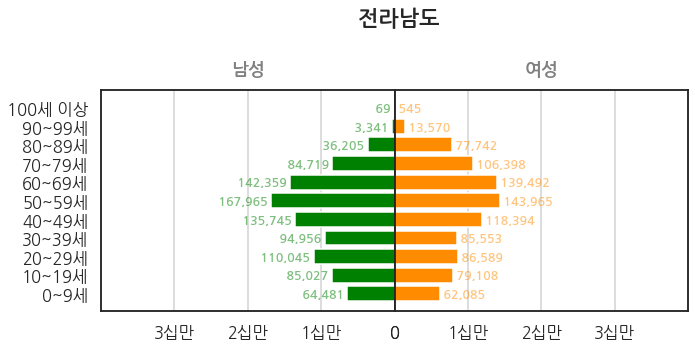

In [94]:
fig = plot_pop("전라남도", popmax=4e5, poptick=1e5)
fig.savefig("85_popkr_25.png")

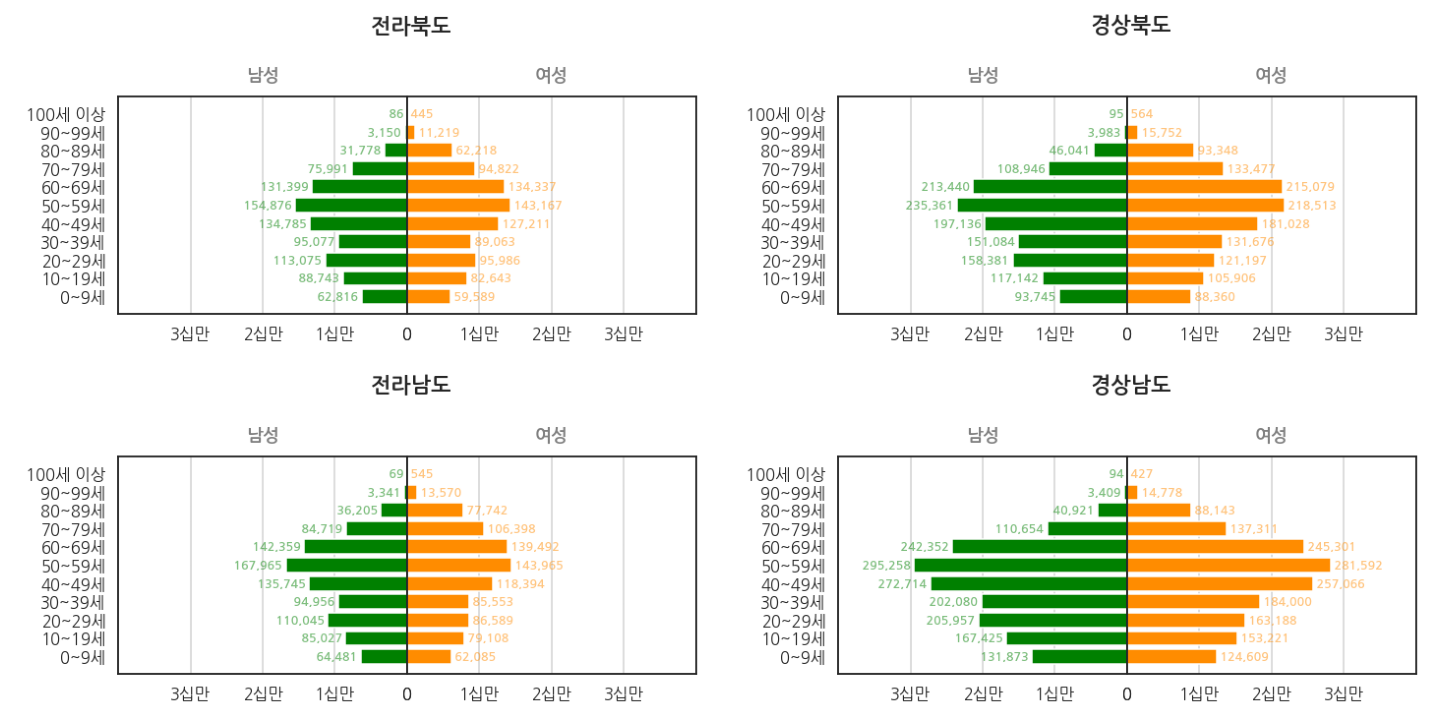

In [95]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 10), constrained_layout=True, 
                         gridspec_kw={"wspace":0, "hspace":0})
axs = axes.ravel()

for ax, img in zip(axs, ["85_popkr_24.png", "85_popkr_22.png", "85_popkr_25.png", "85_popkr_23.png"]):
    im = plt.imread(img)
    ax.imshow(im)
    ax.axis(False)
    
fig.savefig("85_popkr_26.png")

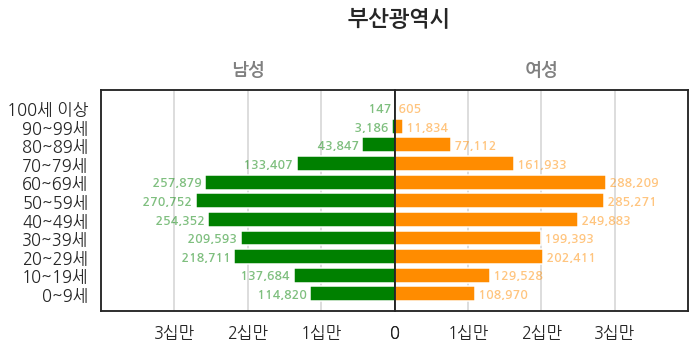

In [96]:
fig = plot_pop("부산광역시", popmax=4e5, poptick=1e5)
fig.savefig("85_popkr_28.png")

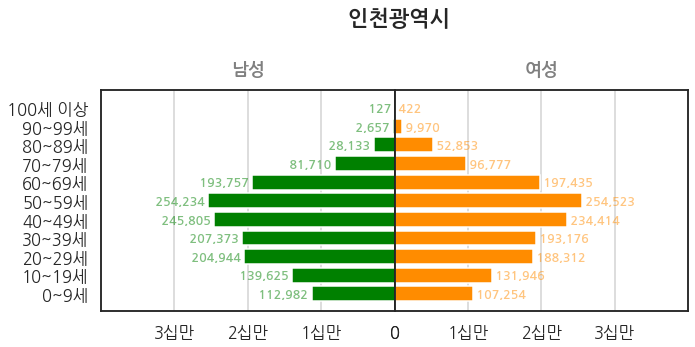

In [97]:
fig = plot_pop("인천광역시", popmax=4e5, poptick=1e5)
fig.savefig("85_popkr_29.png")

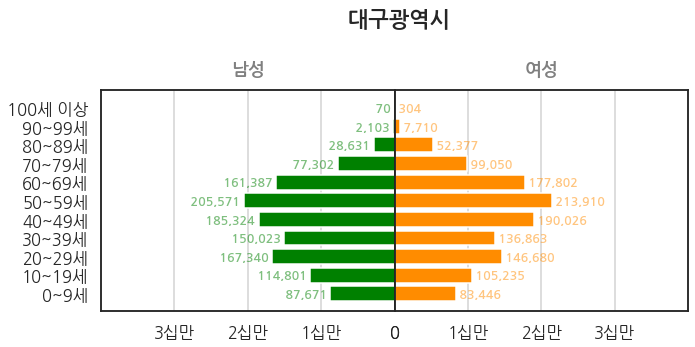

In [98]:
fig = plot_pop("대구광역시", popmax=4e5, poptick=1e5)
fig.savefig("85_popkr_30.png")

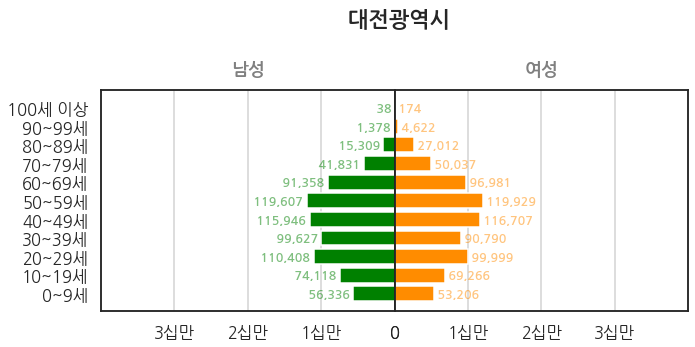

In [99]:
fig = plot_pop("대전광역시", popmax=4e5, poptick=1e5)
fig.savefig("85_popkr_31.png")

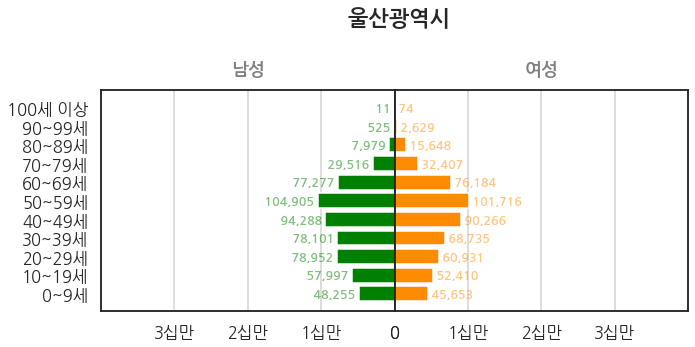

In [103]:
fig = plot_pop("울산광역시", popmax=4e5, poptick=1e5)
fig.savefig("85_popkr_31.png")

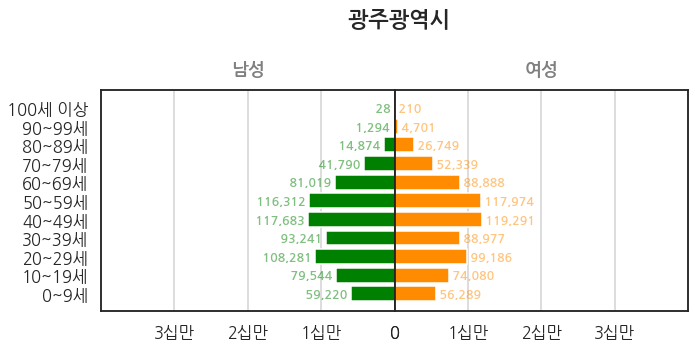

In [104]:
fig = plot_pop("광주광역시", popmax=4e5, poptick=1e5)
fig.savefig("85_popkr_32.png")

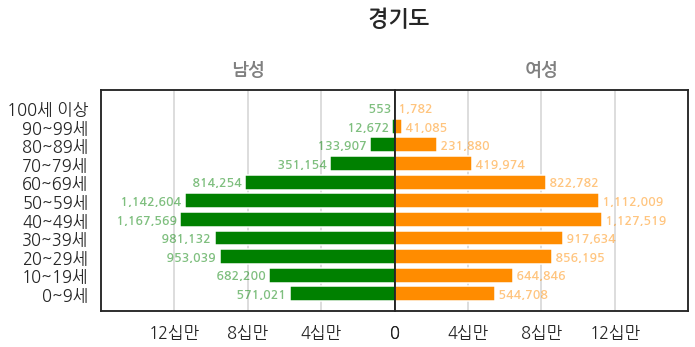

In [111]:
fig = plot_pop("경기도", popmax=1.6e6, poptick=4e5)

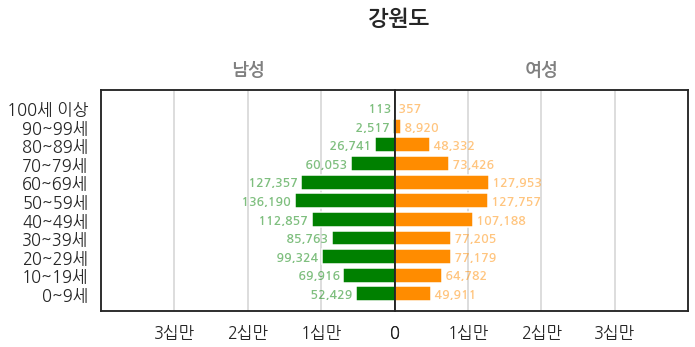

In [112]:
fig = plot_pop("강원도", popmax=4e5, poptick=1e5)

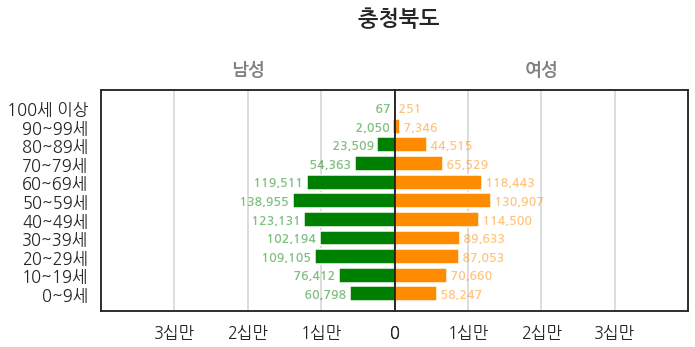

In [113]:
fig = plot_pop("충청북도", popmax=4e5, poptick=1e5)


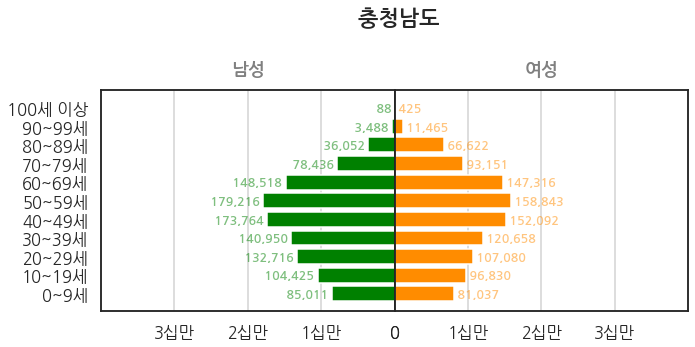

In [114]:
fig = plot_pop("충청남도", popmax=4e5, poptick=1e5)


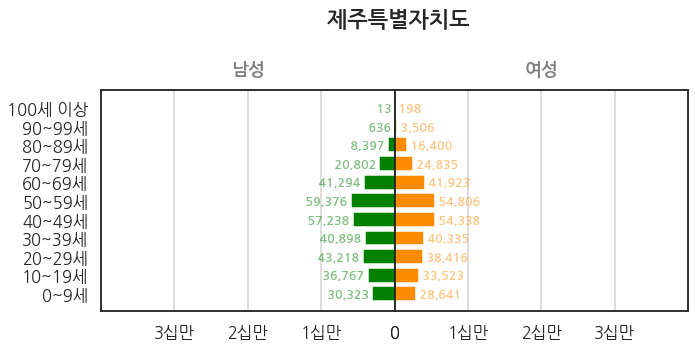

In [115]:
fig = plot_pop("제주특별자치도", popmax=4e5, poptick=1e5)


In [118]:
df_popkrMT.shape

(11, 19)